In [390]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot
 

In [391]:
df = pd.read_csv('ADAUSDT.csv');
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,28-03-2023,0.346,0.349,0.343,0.348,6754605.6,29-03-2023,2.334081e+06,8143,3444359.8,1.190728e+06,0
1,27-03-2023,0.356,0.357,0.337,0.345,127210336.6,28-03-2023,4.418373e+07,120105,57030489.3,1.981093e+07,0
2,26-03-2023,0.351,0.361,0.349,0.356,91774166.9,27-03-2023,3.265150e+07,72275,43527420.9,1.548775e+07,0
3,25-03-2023,0.360,0.363,0.349,0.351,83603550.1,26-03-2023,2.977094e+07,83654,37953417.1,1.353030e+07,0
4,24-03-2023,0.372,0.372,0.355,0.360,112029219.9,25-03-2023,4.064170e+07,109763,52275535.0,1.897136e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,25-03-2019,0.061,0.062,0.056,0.059,313417482.6,26-03-2019,1.850517e+07,49172,158432327.9,9.364228e+06,0
1496,24-03-2019,0.063,0.065,0.059,0.062,415661855.5,25-03-2019,2.550184e+07,71173,204932507.5,1.257689e+07,0
1497,23-03-2019,0.058,0.065,0.057,0.063,534272459.0,24-03-2019,3.255881e+07,86175,256813665.5,1.561654e+07,0
1498,22-03-2019,0.052,0.059,0.052,0.058,421719603.6,23-03-2019,2.380675e+07,66113,213984777.7,1.206511e+07,0


In [392]:
data = df['Close'][::-1];
val = data.reset_index(drop=True); 
val


0       0.052
1       0.058
2       0.063
3       0.062
4       0.059
        ...  
1495    0.360
1496    0.351
1497    0.356
1498    0.345
1499    0.348
Name: Close, Length: 1500, dtype: float64

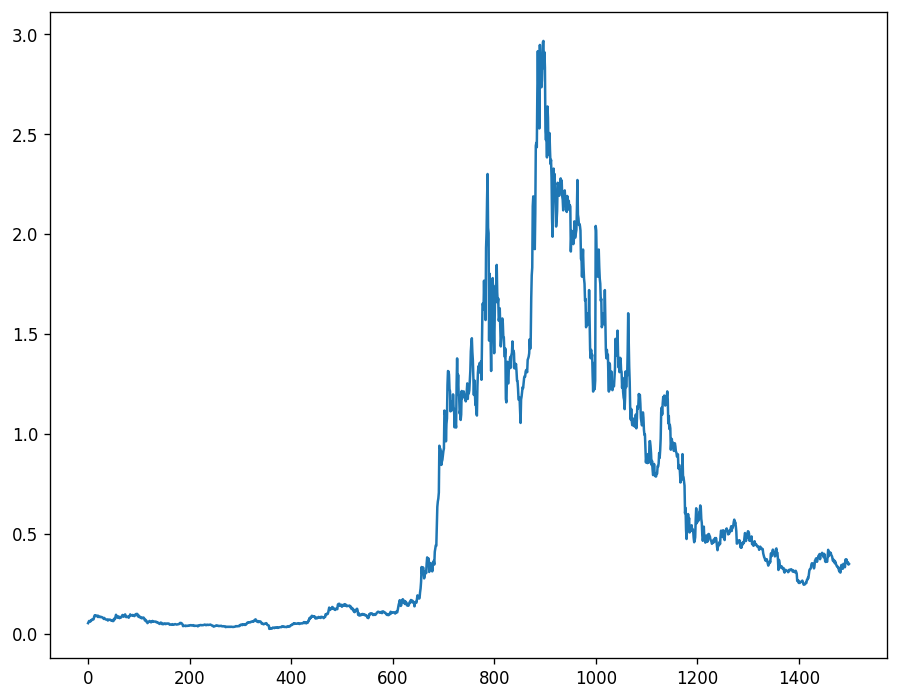

In [393]:
val.plot();

In [395]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])


In [396]:

adf_test(val.dropna());

1. ADF :  -1.5854090233324378
2. P-Value :  0.49091878304588804
3. Num Of Lags :  22


Vì P-value > 0.05, lớn hơn mức ý nghĩa, nên ta sẽ phải dùng phương pháp diff để biến chuỗi về chuỗi dừng.

In [397]:
adf_test(val.diff().dropna());

1. ADF :  -7.910706319380926
2. P-Value :  3.955137006009462e-12
3. Num Of Lags :  21


Vì P-value < 0.05, nên giá trị của I = 1.

C:\Users\bestg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


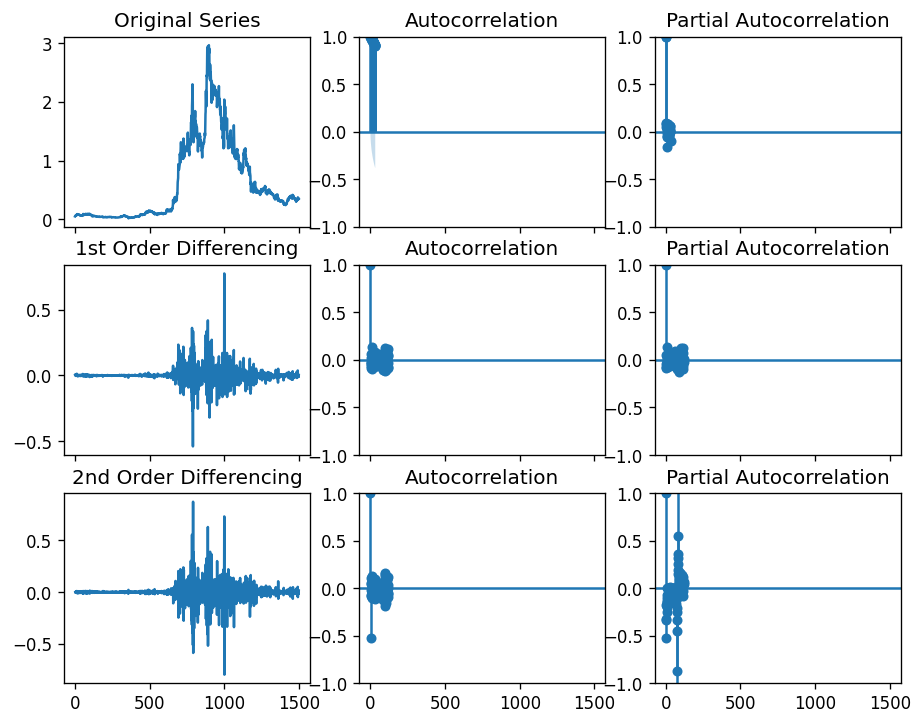

In [398]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 3, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])
plot_pacf(val, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(val.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(val.diff().dropna(), ax=axes[1, 1],lags=120)
plot_pacf(val.diff().dropna(), ax=axes[1, 2],lags=120)

# 2nd Differencing
axes[2, 0].plot(val.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(val.diff().diff().dropna(), ax=axes[2, 1],lags=120)
plot_pacf(val.diff().diff().dropna(), ax=axes[2, 2],lags=120)

plt.show()

<Figure size 1200x1200 with 0 Axes>

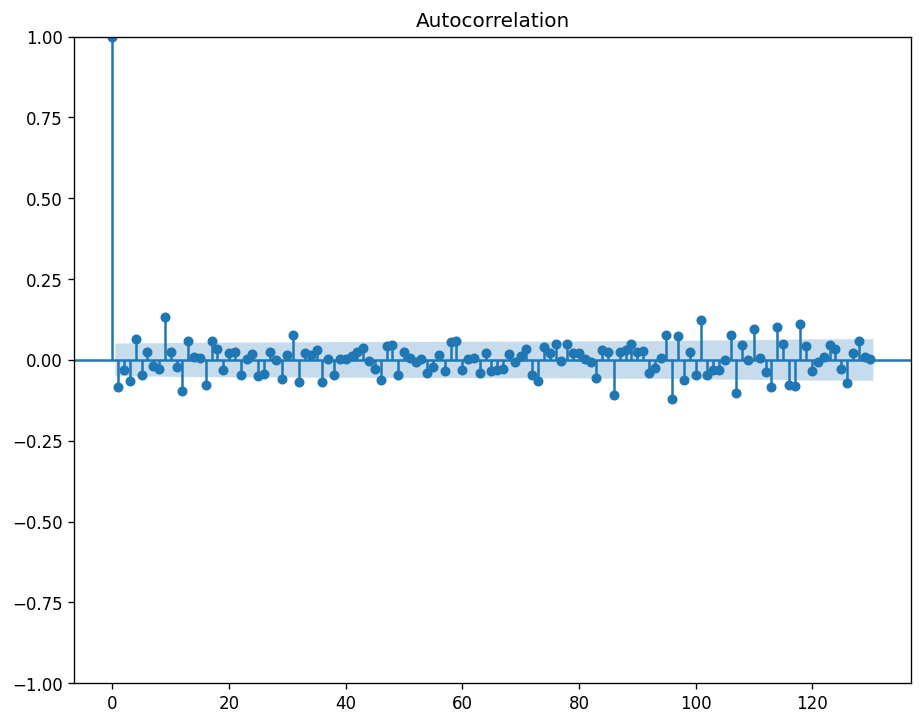

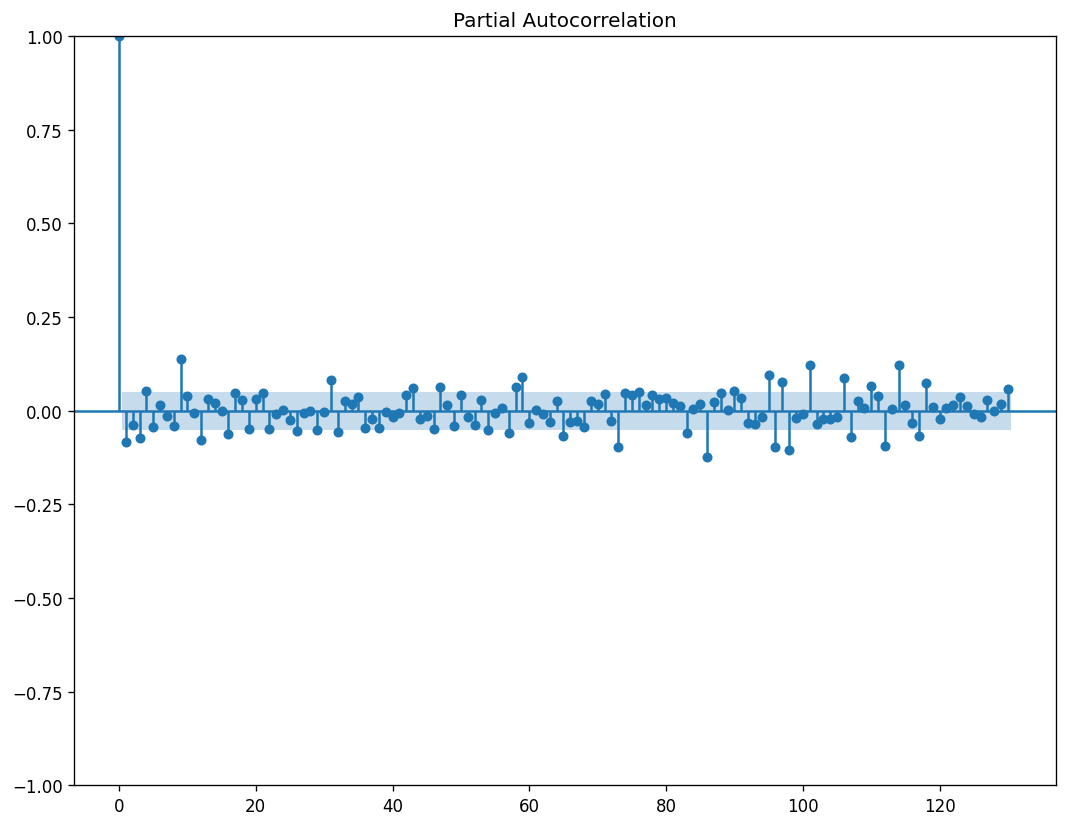

In [399]:
#Tính toán ACF và PACF 
plt.figure(figsize=[10, 10])

sm.graphics.tsa.plot_acf(val.diff().dropna(), lags=130)
plt.show();

sm.graphics.tsa.plot_pacf(val.diff().dropna(),lags=130);
plt.tight_layout();

plt.show();


In [400]:

# Split the data into training, testing, and validation sets 7:2:1
print(val);
train_size = int(0.7 * len(val))
test_size = int(0.2 * len(val))
val_size = len(val) - train_size - test_size

train_data = val[:train_size]
test_data = val[train_size:train_size+test_size]
val_data = val[train_size+test_size:]

0       0.052
1       0.058
2       0.063
3       0.062
4       0.059
        ...  
1495    0.360
1496    0.351
1497    0.356
1498    0.345
1499    0.348
Name: Close, Length: 1500, dtype: float64


In [401]:
# ARIMA Model
model = sm.tsa.arima.ARIMA(train_data, order=(2,1,3))

model_fit = model.fit();


In [402]:
y_pred_test = model_fit.forecast(steps=test_size);
#set index for y_pred_test after train_data
y_pred_test.index = test_data.index

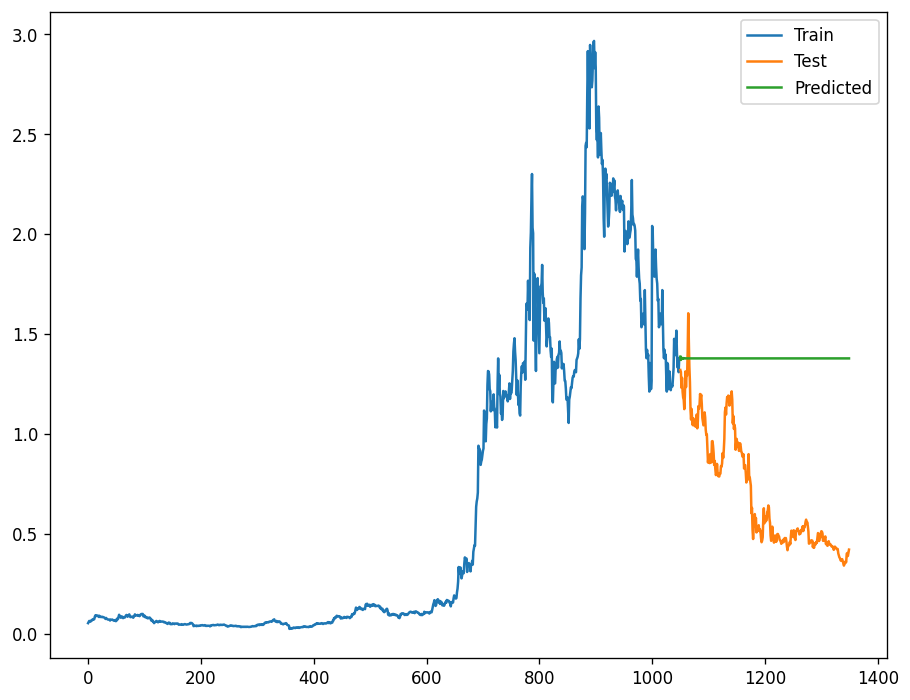

In [403]:
#plot train - test and y pred with label 
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_pred_test, label='Predicted')
plt.legend();


<h2>Loss function</h2>

In [404]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mse = np.mean((forecast - actual)**2)       # MSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'mse':mse})


In [405]:
forecast_accuracy(y_pred_test,test_data)

{'mape': 1.2793351511903672,
 'me': 0.6718068754416271,
 'mae': 0.6740716819245727,
 'mpe': 1.277870143152279,
 'rmse': 0.7323090572983308,
 'mse': 0.53627655540117}

In [406]:
#new model with train - test
# ARIMA Model
train_test_data = val[:int(0.9*len(val))]
model1 = sm.tsa.arima.ARIMA(train_test_data, order=(2,1,3))
model_fit1 = model1.fit();


In [407]:
y_pred_val = model_fit1.forecast(steps=val_size);
y_pred_val.index = val_data.index;

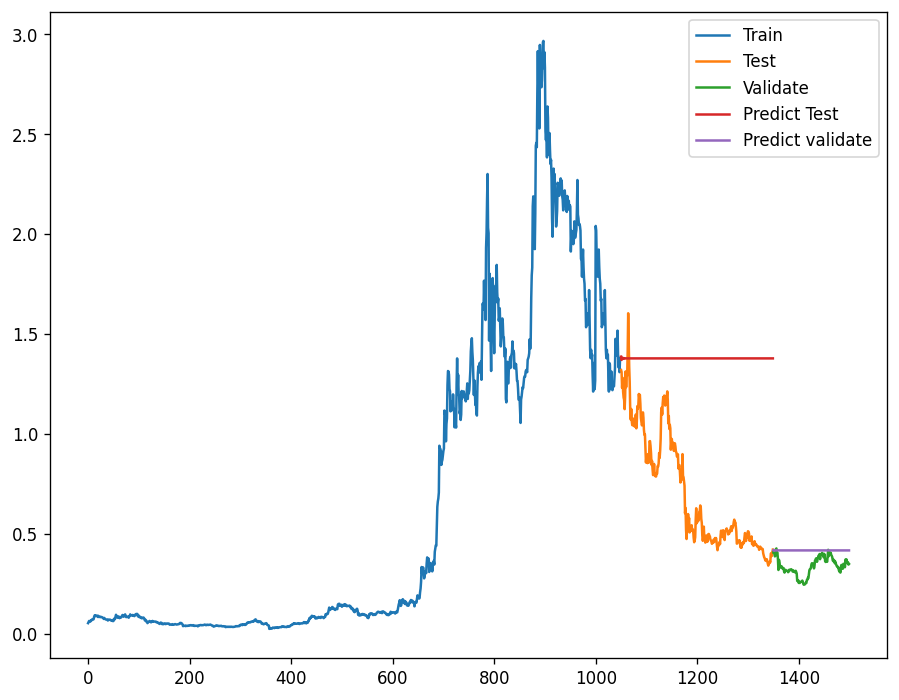

In [408]:
#plot train - test and y pred with label 

plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(val_data, label='Validate')
plt.plot(y_pred_test, label='Predict Test')
plt.plot(y_pred_val, label='Predict validate')
plt.legend();


Predict next 30 days

In [409]:
#Train all data to predict next 30 days.
model1 = sm.tsa.arima.ARIMA(val, order=(2,1,3))
model_fit_all = model1.fit();
y_pred_next_30 = model_fit_all.forecast(steps=30);


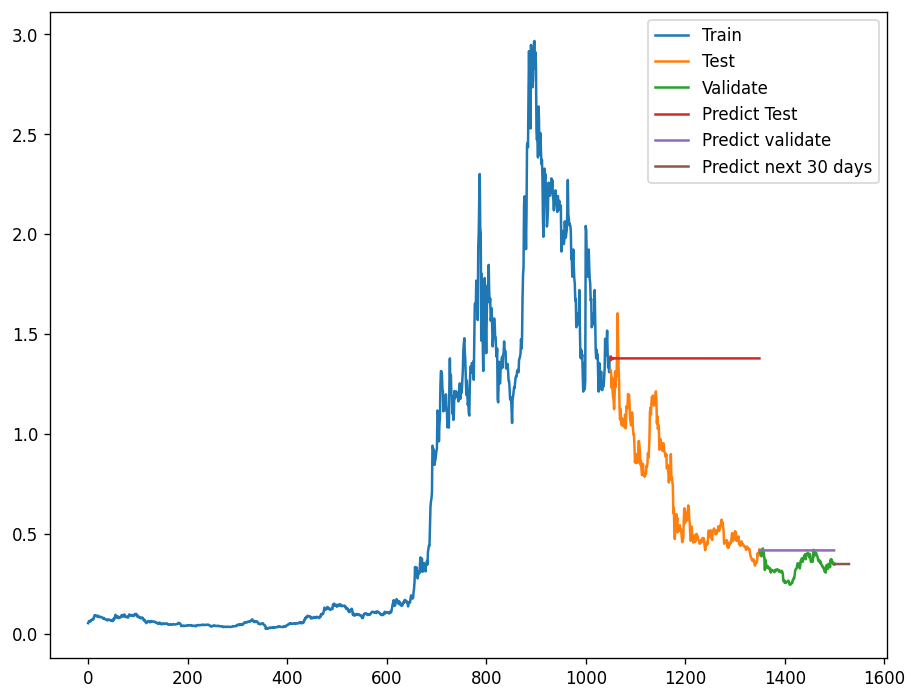

In [410]:
#plot train - test and y pred with label 

plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(val_data, label='Validate')
plt.plot(y_pred_test, label='Predict Test')
plt.plot(y_pred_val, label='Predict validate')
plt.plot(y_pred_next_30, label= "Predict next 30 days");
plt.legend();


<h1>Random Walk Model</h1>

Make noise data

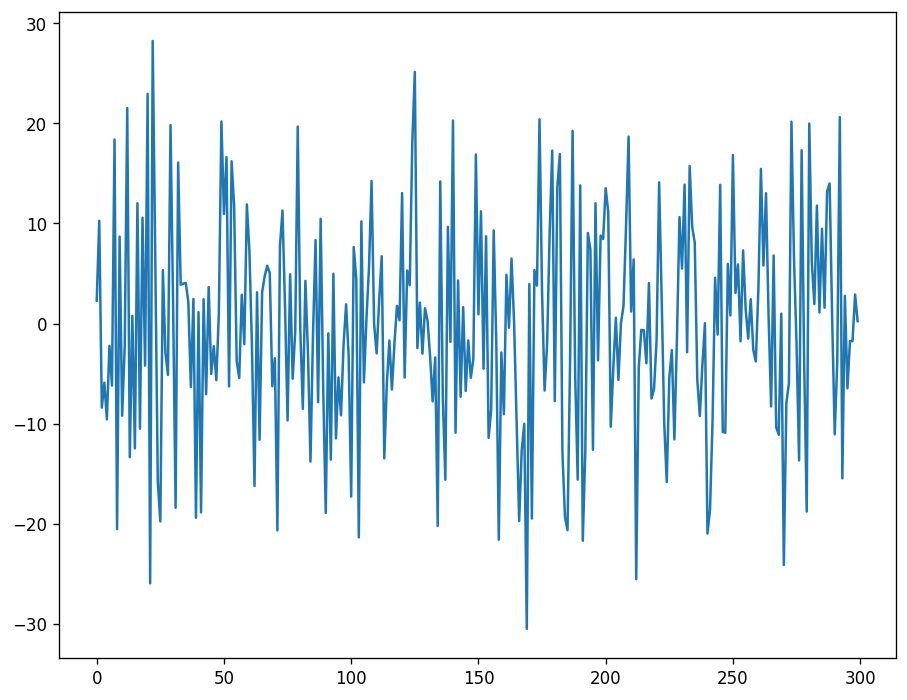

In [411]:
#create random array
def random_noise(n_size):
    #seed 7, loại random dữ liệu là 7, và các 
    #giá trị được random ra thì nó sẽ giữ nguyên mỗi khi chạy.
    np.random.seed(25)
    #random 1 mảng chứa 1 phần tử là 1 mảng có 300 phần tử.
    r = (np.random.randn(1, 1, n_size))*10
    r = r[0][0]
    return list(r);

r = random_noise(test_size);
plt.plot(r);

In [412]:
def rwalk(num, rr):
    rw = [num]
    for i in rr:
        rw.append(rw[-1]+i/100)
    return list(rw)

pr = rwalk(val[int(len(train_data)-1)], r);

Merge Random Walk & ARIMA with test_data and predict test using smoothing (moving average)

In [413]:
def smoothing_avg(list1,list2, n):
    list1 = list(list1);
    list2 = list(list2);
    avgList = [];
    for i in range(n):
        avgList.append((list1[i]+list2[i])/2);
    return pd.DataFrame(list(avgList));


In [414]:
arimar_pred_test = smoothing_avg(y_pred_test, pr, test_size);
arimar_pred_test.index = test_data.index;

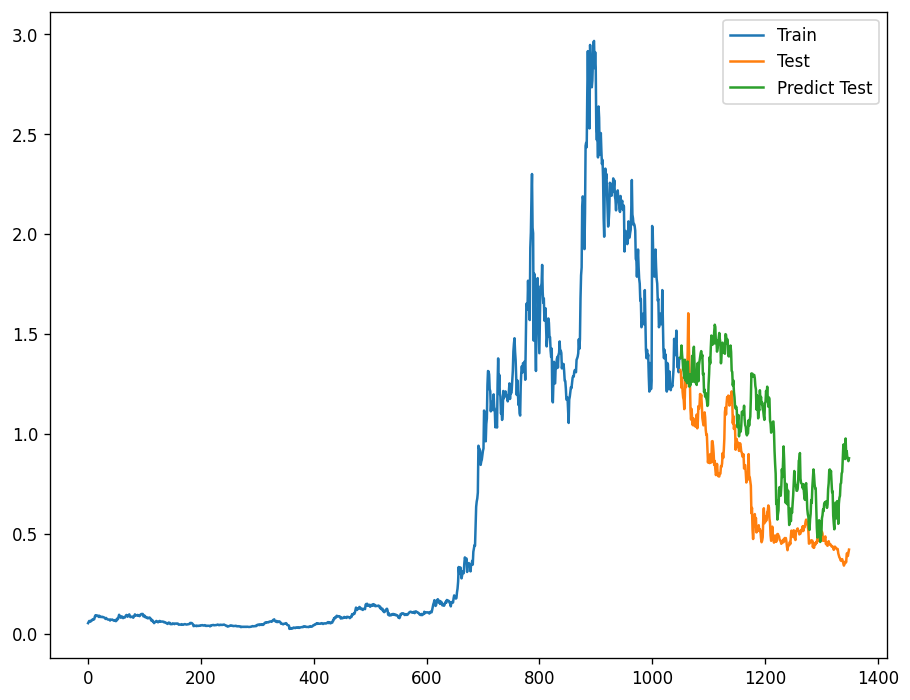

In [415]:
#plot train - test and y pred with label 

plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(arimar_pred_test, label='Predict Test')
plt.legend();


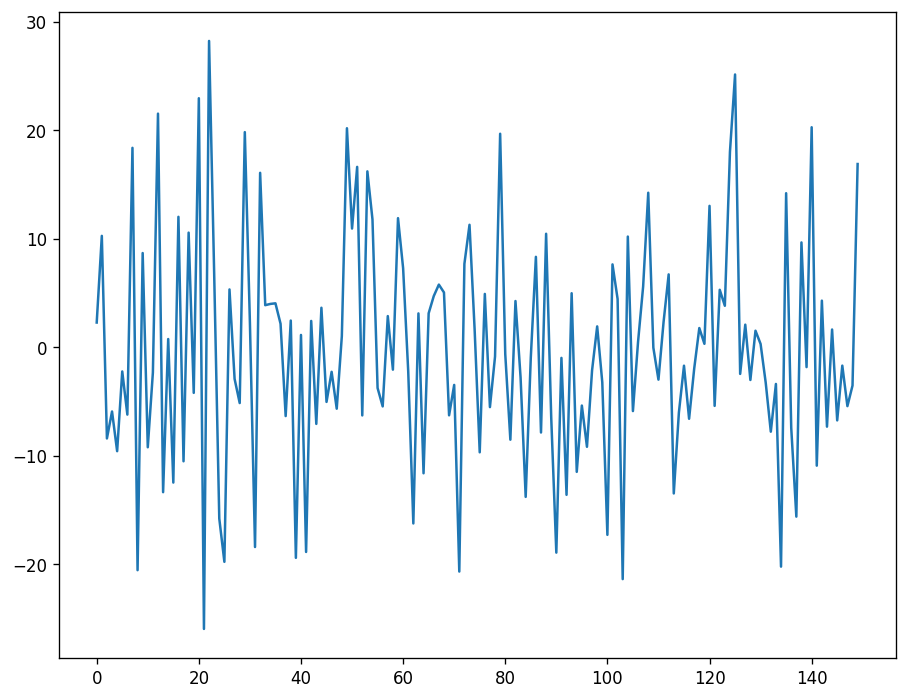

In [416]:
#tạo chuỗi random noise cho validate
r_val = random_noise(val_size);
rw_val = rwalk(int(list(val_data)[0]),r_val)
arimar_pred_val = smoothing_avg(y_pred_val,rw_val,val_size);
arimar_pred_val.index = y_pred_val.index;
plt.plot(r_val)

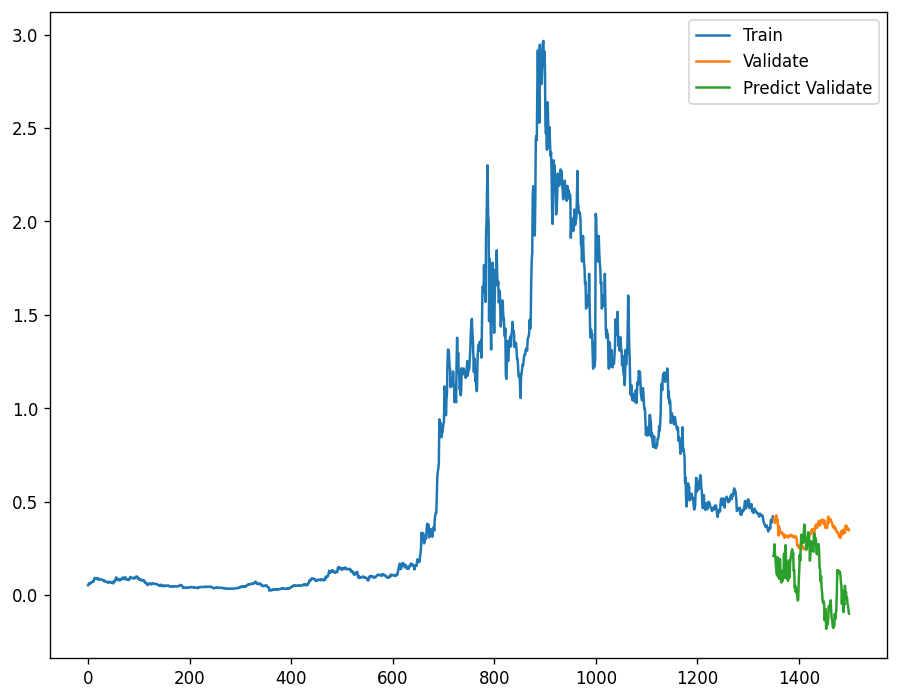

In [417]:
#plot train - test and y pred with label 

plt.plot(train_test_data, label='Train')
plt.plot(val_data, label='Validate')
plt.plot(arimar_pred_val, label='Predict Validate')
plt.legend();


Predict Next 30 days

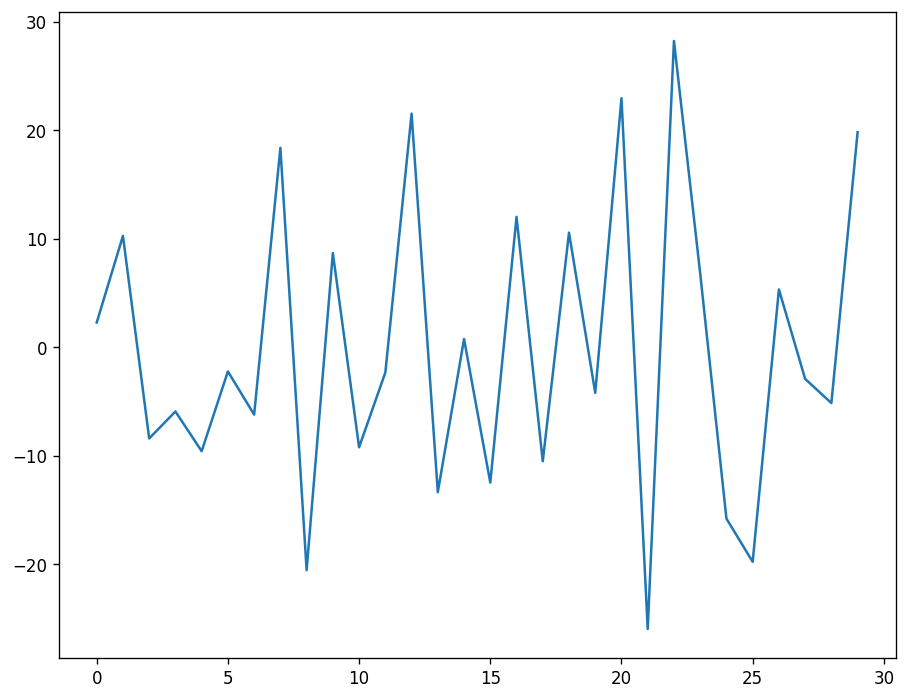

In [425]:
#tạo chuỗi random noise cho validate
r_next_30_days = random_noise(30);
rw_next_30_days  = rwalk(val[len(val)-1],r_val)
arimar_pred_next_30_days  = smoothing_avg(y_pred_next_30,rw_val,30);
arimar_pred_next_30_days.index = y_pred_next_30.index;
plt.plot(r_next_30_days)

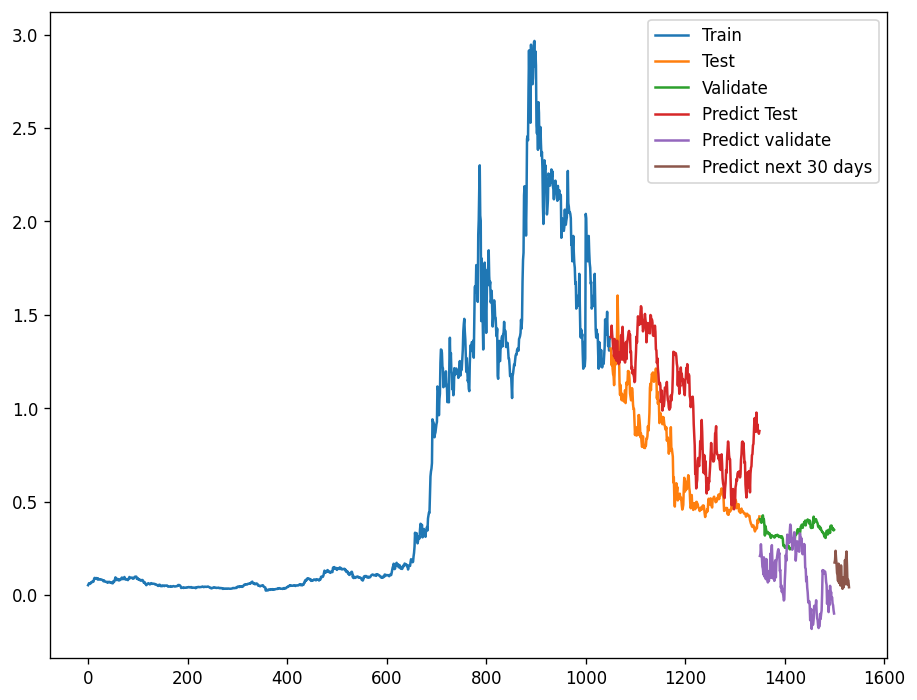

In [427]:
#plot train - test and y pred with label 

plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(val_data, label='Validate')
plt.plot(arimar_pred_test, label='Predict Test')
plt.plot(arimar_pred_val, label='Predict validate')
plt.plot(arimar_pred_next_30_days, label= "Predict next 30 days");
plt.legend();